## Storytelling Data Visualization on Exchange Rates

there are two types of data visualization: 
* Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
*  Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.

Throughout the Project, we focused on explanatory data visualization and learned the following:
* How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
* About the elements of a story and how to create storytelling data visualizations using Matplotlib.
* How to guide the audience's attention with pre-attentive attributes.
* How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("euro-daily-hist_1999_2022.csv")
data.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [3]:
data.shape

(6456, 41)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

### Changing column name and its type 

In [5]:
data.rename(columns={'Period\\Unit:':'Time','[US dollar ]':'USD'},inplace=True)

In [6]:
data['Time'] = pd.to_datetime(data['Time'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      6456 non-null   datetime64[ns]
 1   [Australian dollar ]      6456 non-null   object        
 2   [Bulgarian lev ]          6054 non-null   object        
 3   [Brazilian real ]         6188 non-null   object        
 4   [Canadian dollar ]        6456 non-null   object        
 5   [Swiss franc ]            6456 non-null   object        
 6   [Chinese yuan renminbi ]  6188 non-null   object        
 7   [Cypriot pound ]          2346 non-null   object        
 8   [Czech koruna ]           6456 non-null   object        
 9   [Danish krone ]           6456 non-null   object        
 10  [Estonian kroon ]         3130 non-null   object        
 11  [UK pound sterling ]      6456 non-null   object        
 12  [Greek drachma ]    

In [8]:
data.columns

Index(['Time', '[Australian dollar ]', '[Bulgarian lev ]', '[Brazilian real ]',
       '[Canadian dollar ]', '[Swiss franc ]', '[Chinese yuan renminbi ]',
       '[Cypriot pound ]', '[Czech koruna ]', '[Danish krone ]',
       '[Estonian kroon ]', '[UK pound sterling ]', '[Greek drachma ]',
       '[Hong Kong dollar ]', '[Croatian kuna ]', '[Hungarian forint ]',
       '[Indonesian rupiah ]', '[Israeli shekel ]', '[Indian rupee ]',
       '[Iceland krona ]', '[Japanese yen ]', '[Korean won ]',
       '[Lithuanian litas ]', '[Latvian lats ]', '[Maltese lira ]',
       '[Mexican peso ]', '[Malaysian ringgit ]', '[Norwegian krone ]',
       '[New Zealand dollar ]', '[Philippine peso ]', '[Polish zloty ]',
       '[Romanian leu ]', '[Russian rouble ]', '[Swedish krona ]',
       '[Singapore dollar ]', '[Slovenian tolar ]', '[Slovak koruna ]',
       '[Thai baht ]', '[Turkish lira ]', 'USD', '[South African rand ]'],
      dtype='object')

In [9]:
data.sort_values('Time',inplace=True)

In [10]:
data.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],USD,[South African rand ]
6455,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [11]:
euro_to_dollar = data[['Time','USD']].copy()
euro_to_dollar['USD'].value_counts()

-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: USD, Length: 3769, dtype: int64

we have 62 dashes that may be due to holidays or some other reasons

In [12]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['USD'] != '-']
euro_to_dollar['USD'] = euro_to_dollar['USD'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    6394 non-null   datetime64[ns]
 1   USD     6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


### Rolling Mean 

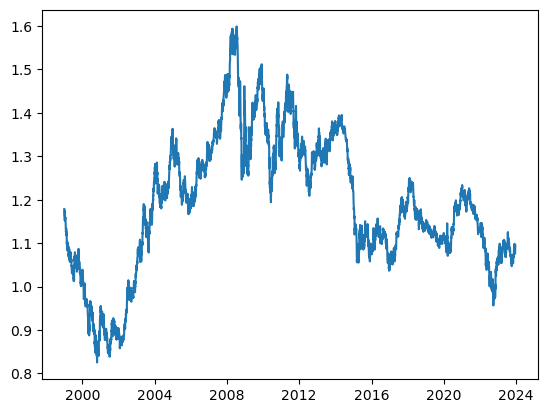

In [13]:
plt.plot(euro_to_dollar['Time'] , euro_to_dollar['USD'])
plt.show()

If we look at the line's shape, we see many small wiggles rather than seeing a smooth line. The wiggles, however, have meaning:: they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

#### Moving Average 

In [14]:
value =pd.DataFrame() #create empty data frame and store in values 
value['daily_value'] = pd.Series(range(1,20,2)) #number generate  from 1 to 20 with diff of 2 and store in daily column
value

,daily_value
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [15]:
value['rolling_mean_2'] = value['daily_value'].rolling(2).mean()
value['rolling_mean_3'] = value['daily_value'].rolling(3).mean()
value['rolling_mean_4'] = value['daily_value'].rolling(4).mean()
value

,daily_value,rolling_mean_2,rolling_mean_3,rolling_mean_4
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,4.0
4,9,8.0,7.0,6.0
5,11,10.0,9.0,8.0
6,13,12.0,11.0,10.0
7,15,14.0,13.0,12.0
8,17,16.0,15.0,14.0
9,19,18.0,17.0,16.0


### Graph 

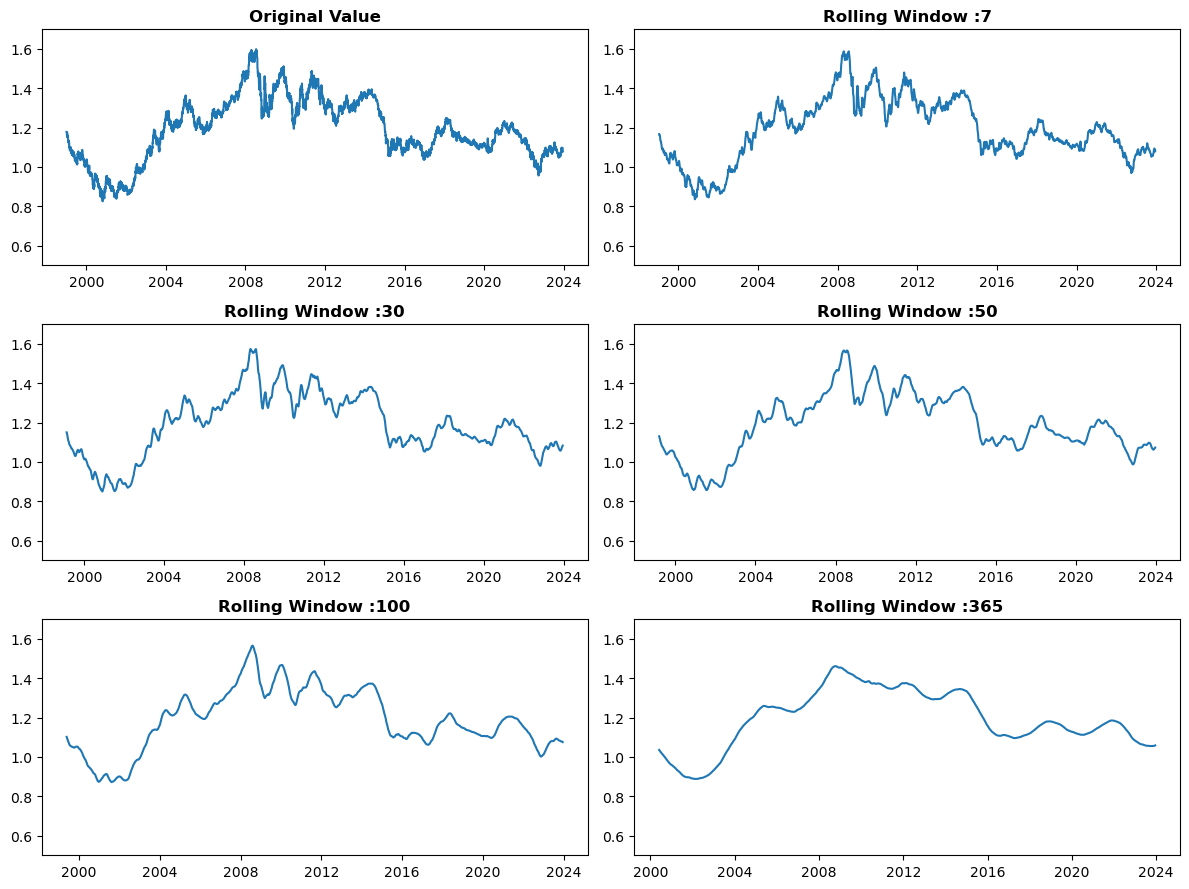

In [16]:
plt.figure(figsize=(12,9))
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'],euro_to_dollar['USD'])
plt.title('Original Value', weight = 'bold')
plt.ylim(0.5, 1.7)

for i, rolling_mean in zip([2,3,4,5,6 ], # second grapg , third graph , ..
                          [7,30,50,100,365 ]): #7 days rolling for second graph , 30 days rolling , ... 
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'], #x-axis
             euro_to_dollar['USD'].rolling(rolling_mean).mean()) #y-axis
    plt.title('Rolling Window :' + str(rolling_mean), weight = 'bold') 
    plt.ylim(0.5, 1.7)
        
plt.tight_layout()
plt.show()

#### So we can see that last graph clearly that between '2001 to 2003' Euro to USD rates were down while in 2008 it was at peak.
 Now we will find out the reasons or factors like Govt. Financial crisis etc

### Coming up with an Idea
Here are a few story ideas for our data:
* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

* We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot. 

* We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

In [17]:
euro_to_dollar['Rolling_Mean_30'] = euro_to_dollar['USD'].rolling(30).mean()
euro_to_dollar

,Time,USD,Rolling_Mean_30
6455,1999-01-04,1.1789,NaN
6454,1999-01-05,1.1790,NaN
6453,1999-01-06,1.1743,NaN
6452,1999-01-07,1.1632,NaN
6451,1999-01-08,1.1659,NaN
...,...,...,...
4,2023-12-11,1.0757,1.080143
3,2023-12-12,1.0804,1.080760
2,2023-12-13,1.0787,1.081593
1,2023-12-14,1.0919,1.082453


###  Story Telling & Visulization

#### Financial Crisis 2007 - 2008

In [18]:
financial_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year <= 2009)]
finacnial_crisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007) & (euro_to_dollar['Time'].dt.year <= 2008)]

In [19]:
financial_crisis

,Time,USD,Rolling_Mean_30
4630,2006-01-02,1.1826,1.183087
4629,2006-01-03,1.1875,1.183300
4628,2006-01-04,1.2083,1.184573
4627,2006-01-05,1.2088,1.185613
4626,2006-01-06,1.2093,1.186647
...,...,...,...
3592,2009-12-24,1.4398,1.477640
3590,2009-12-28,1.4405,1.476097
3589,2009-12-29,1.4433,1.474323
3588,2009-12-30,1.4338,1.472533


In [20]:
finacnial_crisis_7_8

,Time,USD,Rolling_Mean_30
4369,2007-01-02,1.3270,1.314257
4368,2007-01-03,1.3231,1.315780
4367,2007-01-04,1.3106,1.316663
4366,2007-01-05,1.3084,1.317563
4365,2007-01-08,1.3006,1.317963
...,...,...,...
3854,2008-12-23,1.3978,1.303717
3853,2008-12-24,1.4005,1.308633
3850,2008-12-29,1.4270,1.314450
3849,2008-12-30,1.4098,1.319193


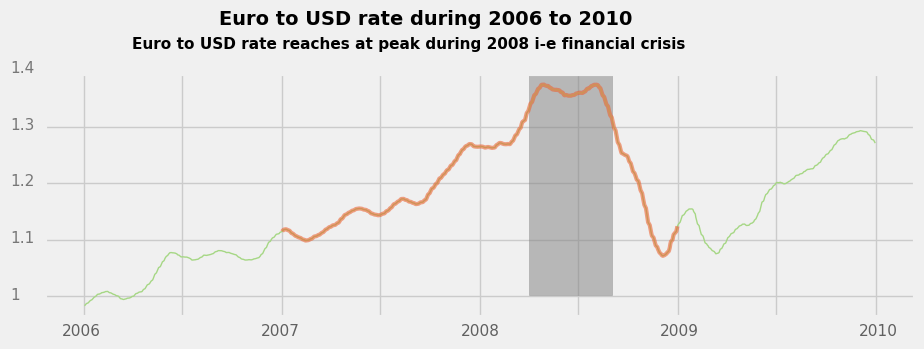

In [33]:
import matplotlib.style as style
style.use('fivethirtyeight')

fig,ax = plt.subplots(figsize=(10,3))
ax.plot(financial_crisis['Time'],financial_crisis['Rolling_Mean_30'], linewidth = 1, color = '#A6D785')
ax.plot(finacnial_crisis_7_8['Time'], finacnial_crisis_7_8['Rolling_Mean_30'],linewidth = 3, color = '#eb6534',alpha=0.6)

ax.set_xticklabels([])

x=0.02# 
for year in ['2006','2007','2008','2009','2010']:
    ax.text(x,-0.08, year, alpha =0.6, fontsize=11, transform=plt.gca().transAxes)
    x += 0.22888

ax.set_yticklabels([])
y=0.07
for rate in ['1','1.1','1.2','1.3','1.4']:
    ax.text(-0.04,y,rate,alpha =0.5, fontsize=11, transform=plt.gca().transAxes)
    y += 0.2333
    
ax.text(0.2,1.2, "Euro to USD rate during 2006 to 2010", weight='bold',transform = plt.gca().transAxes)
ax.text(0.1,1.1, "Euro to USD rate reaches at peak during 2008 i-e financial crisis", weight='bold',size = 11, transform = plt.gca().transAxes)

ax.axvspan(xmin=pd.to_datetime("2008-04-1"), xmax=pd.to_datetime("2008-09-1"),ymin=0.09, color='gray',alpha=0.5)
plt.show()

### Covid19

In [37]:
covid_20 = euro_to_dollar.loc[(euro_to_dollar['Time'] >= '2020-01-01') & (euro_to_dollar['Time'] <= '2020-12-31')]
covid = euro_to_dollar.loc[(euro_to_dollar['Time'] >= '2016-01-01') & (euro_to_dollar['Time'] <= '2019-12-31')]

In [38]:
covid

,Time,USD,Rolling_Mean_30
2040,2016-01-04,1.0898,1.081743
2039,2016-01-05,1.0746,1.081937
2038,2016-01-06,1.0742,1.082307
2037,2016-01-07,1.0868,1.083030
2036,2016-01-08,1.0861,1.083947
...,...,...,...
1023,2019-12-23,1.1075,1.106783
1022,2019-12-24,1.1080,1.107000
1021,2019-12-27,1.1153,1.107490
1020,2019-12-30,1.1189,1.108130


In [39]:
covid_20

,Time,USD,Rolling_Mean_30
1018,2020-01-02,1.1193,1.109237
1017,2020-01-03,1.1147,1.109470
1016,2020-01-06,1.1194,1.109920
1015,2020-01-07,1.1172,1.110190
1014,2020-01-08,1.1115,1.110380
...,...,...,...
766,2020-12-24,1.2193,1.204173
765,2020-12-28,1.2219,1.205520
764,2020-12-29,1.2259,1.206950
763,2020-12-30,1.2281,1.208280


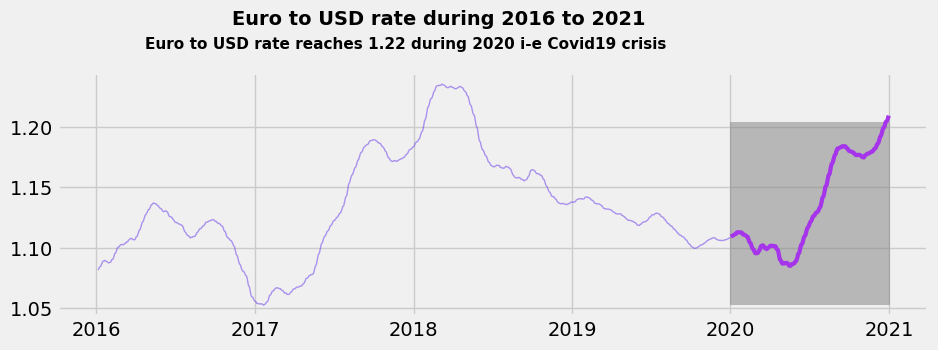

In [42]:
import matplotlib.style as style
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(covid['Time'],covid['Rolling_Mean_30'],linewidth=1,color='#6434eb', alpha = 0.5)
ax.plot(covid_20['Time'],covid_20['Rolling_Mean_30'],linewidth=3,color='#a534eb')

ax.text(0.2,1.2, "Euro to USD rate during 2016 to 2021", weight='bold',transform = plt.gca().transAxes)
ax.text(0.1,1.1, "Euro to USD rate reaches 1.22 during 2020 i-e Covid19 crisis", weight='bold',size = 11, transform = plt.gca().transAxes)

ax.axvspan(xmin=pd.to_datetime("2020-01-1"), xmax=pd.to_datetime("2020-12-31"),ymin=0.05,ymax=0.8, color='gray',alpha=0.5)

plt.show()

### The Thress US Presidents Example 

In [48]:
all = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = all.copy()[(all['Time'].dt.year < 2009)]
obama = all.copy()[all['Time'].dt.year >= 2009 & (all['Time'].dt.year < 2017)]
trump = all.copy()[all['Time'].dt.year >= 2017 & (all['Time'].dt.year < 2021)]

In [49]:
all

,Time,USD,Rolling_Mean_30
5934,2001-01-02,0.9423,0.883343
5933,2001-01-03,0.9530,0.886660
5932,2001-01-04,0.9458,0.889893
5931,2001-01-05,0.9545,0.893463
5930,2001-01-08,0.9497,0.897023
...,...,...,...
766,2020-12-24,1.2193,1.204173
765,2020-12-28,1.2219,1.205520
764,2020-12-29,1.2259,1.206950
763,2020-12-30,1.2281,1.208280


In [45]:
bush

,Time,USD,Rolling_Mean_30
5934,2001-01-02,0.9423,0.883343
5933,2001-01-03,0.9530,0.886660
5932,2001-01-04,0.9458,0.889893
5931,2001-01-05,0.9545,0.893463
5930,2001-01-08,0.9497,0.897023
...,...,...,...
3854,2008-12-23,1.3978,1.303717
3853,2008-12-24,1.4005,1.308633
3850,2008-12-29,1.4270,1.314450
3849,2008-12-30,1.4098,1.319193


In [46]:
obama

,Time,USD,Rolling_Mean_30
5934,2001-01-02,0.9423,0.883343
5933,2001-01-03,0.9530,0.886660
5932,2001-01-04,0.9458,0.889893
5931,2001-01-05,0.9545,0.893463
5930,2001-01-08,0.9497,0.897023
...,...,...,...
766,2020-12-24,1.2193,1.204173
765,2020-12-28,1.2219,1.205520
764,2020-12-29,1.2259,1.206950
763,2020-12-30,1.2281,1.208280


In [47]:
trump

,Time,USD,Rolling_Mean_30
5934,2001-01-02,0.9423,0.883343
5933,2001-01-03,0.9530,0.886660
5932,2001-01-04,0.9458,0.889893
5931,2001-01-05,0.9545,0.893463
5930,2001-01-08,0.9497,0.897023
...,...,...,...
766,2020-12-24,1.2193,1.204173
765,2020-12-28,1.2219,1.205520
764,2020-12-29,1.2259,1.206950
763,2020-12-30,1.2281,1.208280


Below, you'll notice we used matplotlib's functional approach to build the graphs. We use this approach because it offers more flexibility in arranging the subplots: 
* We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
* We then build only the bottom graph of a 2-by-1 grid (this grid should have two subplots; the top row remains empty). 
* The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.

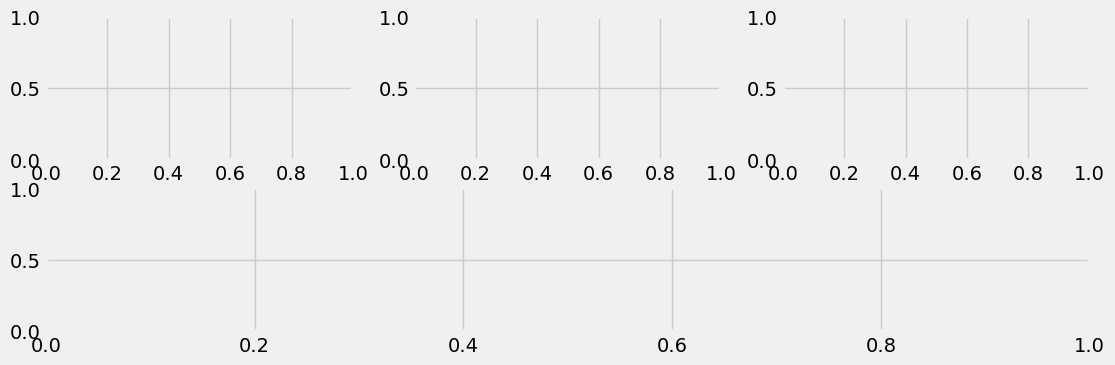

In [50]:
style.use('fivethirtyeight')

plt.figure(figsize=(12,6))

ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)

ax4 = plt.subplot(3,1,2)

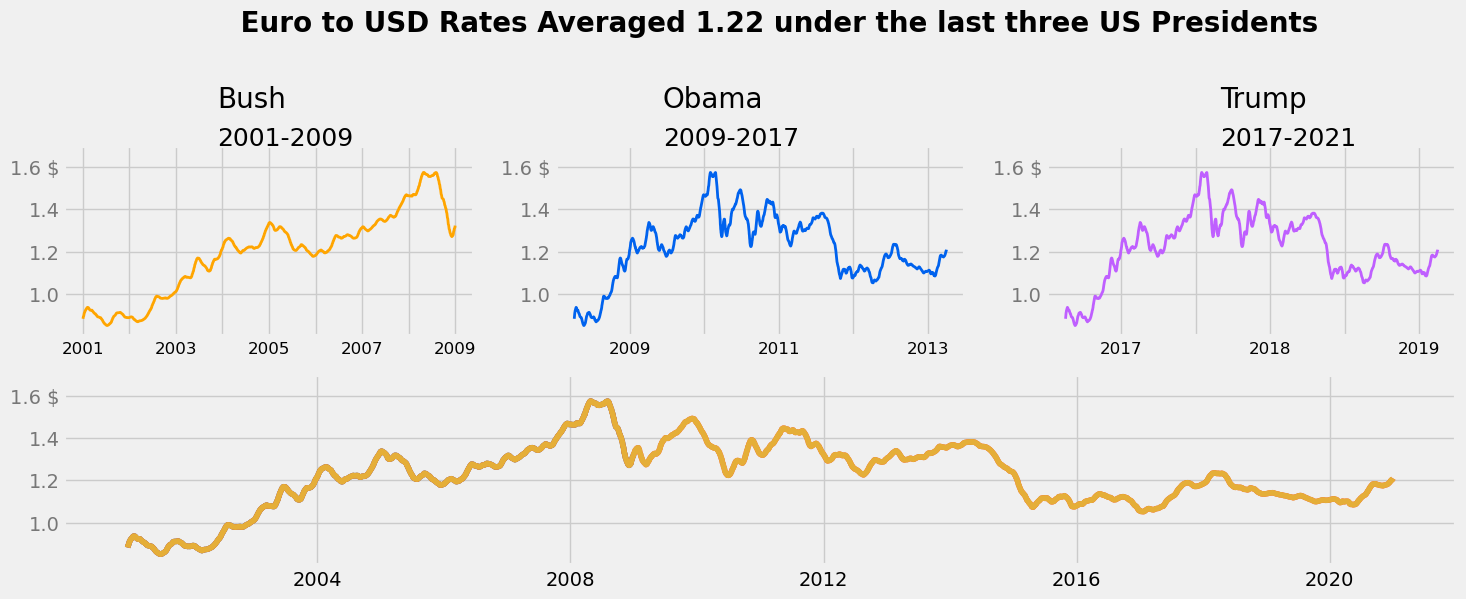

In [94]:
style.use('fivethirtyeight')

plt.figure(figsize=(16,8))

# for subplots
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)

#for large plot
ax4 = plt.subplot(3,1,2)

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6 $'],alpha=0.5)

#Bush
ax1.plot(bush['Time'],bush['Rolling_Mean_30'],linewidth=2,color='#ffa500')
ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'],fontsize=12)
ax1.text(0.11,2.4,'Bush',fontsize=20,color='black',transform=plt.gca().transAxes)
ax1.text(0.11,2.2,'2001-2009',fontsize=18,color='black',transform=plt.gca().transAxes)

#Obama
ax2.plot(obama['Time'],obama['Rolling_Mean_30'],linewidth=2,color='#0062EE')
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'],fontsize=12)
ax2.text(0.43,2.4,'Obama',fontsize=20,color='black',transform=plt.gca().transAxes)
ax2.text(0.43,2.2,'2009-2017',fontsize=18,color='black',transform=plt.gca().transAxes)

#Trump
ax3.plot(trump['Time'],trump['Rolling_MeanP_30'],linewidth=2,color='#BF5FFF')
ax3.set_xticklabels(['','2017','','2018P','','2019','','2020','','2021'],fontsize=12)
ax3.text(0.83,2.4,'Trump',fontsize=20,color='black',transform=plt.gca().transAxes)
ax3.text(0.83,2.2,'2017-2021',fontsize=18,color='black',transform=plt.gca().transAxes)

#merging
ax4.plot(bush['Time'],bush['Rolling_Mean_30'])
ax4.plot(obama['Time'],obama['Rolling_Mean_30'])
ax4.plot(trump['Time'],trump['Rolling_Mean_30'])


ax1.text(0.12, 2.8, ' Euro to USD Rates Averaged 1.22 under the last three US Presidents ', fontsize=20, weight='bold', transform=plt.gca().transAxes)
plt.show()

## Findings
Euro to USD exchange rates reached at peak during 2008 in Financial Crisis in the era of president Bush.